In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
import numpy as np 
from scipy.optimize import curve_fit
import scipy
from operators.aw_hermite.aw_hermite_operators import aw_psi_hermite, aw_psi_hermite_complement
from operators.adaptive_aw_hermite import P_case_iii, P_case_ii, P_case_i, a_constant, b_constant, check_if_update_needed, updated_u, updated_alpha

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from mycolorpy import colorlist as mcp
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

# Enable LaTeX rendering
matplotlib.rcParams['text.usetex'] = True

In [4]:
v = np.linspace(-5, 5, int(10000))
alpha = 1
u = 0

In [5]:
f0 = np.exp(-(v-u)**2/(alpha**2)) / np.sqrt(np.pi) +  0.2*np.exp(-10*(v-2)**2)/ np.sqrt(np.pi)

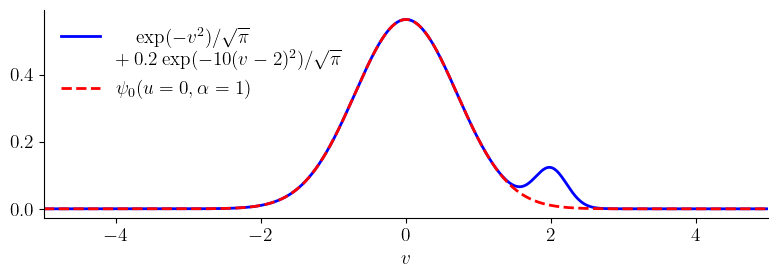

In [6]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(v, f0, label=r"$\exp(-v^2)/\sqrt{\pi} \\+ 0.2\exp(-10(v-2)^2)/\sqrt{\pi}$", color="blue", linewidth=2)
ax.plot(v, aw_psi_hermite(n=0, alpha_s=alpha, u_s=u, v=v), color="red", ls="--", label=r"$\psi_{0}(u=0, \alpha=1)$", linewidth=2)
legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=14, loc='upper left')
legend.get_frame().set_alpha(0)
ax.set_xlim(-5, 5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("$v$")
plt.tight_layout()
plt.savefig("../figures/functional_analysis/test.png", dpi=300) 

# Lets project this on the AW Hemrite basis 

In [7]:
Nv = 10

In [8]:
C = np.zeros(Nv) 

for ii in range(Nv):
    C[ii] = scipy.integrate.trapezoid(f0*aw_psi_hermite_complement(n=ii, alpha_s=alpha, u_s=u, v=v), x=v, dx=np.abs(v[1] - v[0])) /alpha

In [9]:
sol_full = np.zeros(len(v))
sol_3 = np.zeros(len(v))
for nn in range(Nv):
    sol_full += C[nn] * aw_psi_hermite(n=nn, alpha_s=alpha, u_s=u, v=v)
for nn in range(3):
    sol_3 += C[nn] * aw_psi_hermite(n=nn, alpha_s=alpha, u_s=u, v=v)

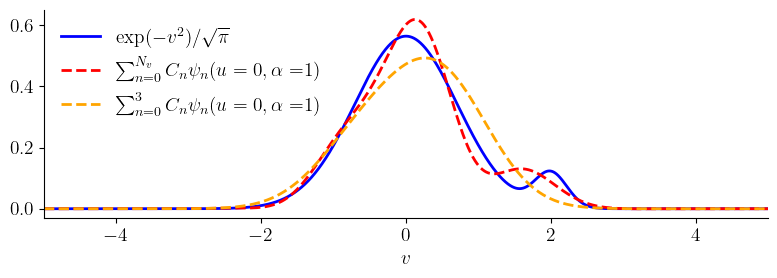

In [10]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(v, f0, label=r"$\exp(-v^2)/\sqrt{\pi}$", color="blue", linewidth=2)
ax.plot(v, sol_full, color="red", ls="--", label=r"$\sum_{n=0}^{N_{v}} C_{n}\psi_{n}(u=0, \alpha=$" +  str(alpha) +r"$)$", linewidth=2)
ax.plot(v, sol_3, color="orange", ls="--", label=r"$\sum_{n=0}^{3} C_{n}\psi_{n}(u=0, \alpha=$" +  str(alpha) +r"$)$", linewidth=2)

legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=14, loc='upper left')
legend.get_frame().set_alpha(0)
ax.set_xlim(-5, 5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("$v$")
plt.tight_layout()
plt.savefig("../figures/functional_analysis/alpha_approx_" + str(alpha) + ".png", dpi=300) 

# What happens when $\alpha$ is not "optimal"?

What is the alpha based on Cecilia's method?

In [11]:
alpha_new = updated_alpha(alpha_prev=alpha,
              C20=C[2],
              C10=C[1],
              C00=C[0])
print(alpha_new)
alpha_new = 0.5

1.1806889839224328


In [12]:
P = P_case_iii(alpha_prev=alpha, alpha_curr=alpha_new, Nv=Nv)

In [13]:
C_new = P @ C

In [14]:
sol = np.zeros(len(v))
for nn in range(Nv):
    sol += C_new[nn] * aw_psi_hermite(n=nn, alpha_s=alpha_new, u_s=u, v=v)

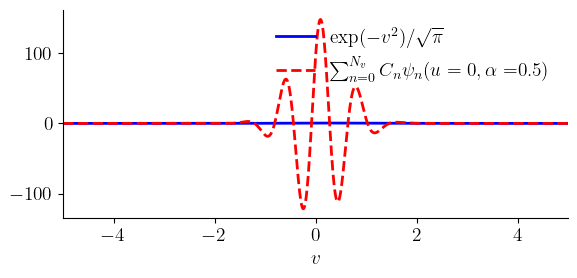

In [15]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(v, f0, label=r"$\exp(-v^2)/\sqrt{\pi}$", color="blue", linewidth=2)
ax.plot(v, sol, color="red", ls="--", label=r"$\sum_{n=0}^{N_{v}} C_{n}\psi_{n}(u=0, \alpha=$" +  str(alpha_new) +r"$)$", linewidth=2)
legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=14, loc='upper right')
legend.get_frame().set_alpha(0)
ax.set_xlim(-5, 5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("$v$")
plt.tight_layout()
plt.savefig("../figures/functional_analysis/alpha_approx_" + str(alpha_new) + ".png", dpi=300) 

# What happens when $u$ is not "optimal"?

In [16]:
C = np.zeros(Nv) 
C[0] = 1
u_new = 1.5

In [17]:
P = P_case_ii(u_curr=u_new, u_prev=u, alpha_prev=alpha, Nv=Nv)
C_new = P @ C

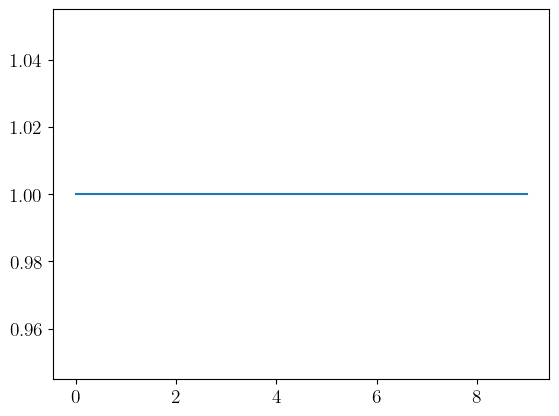

In [18]:
plt.plot(np.diag(P))

In [19]:
sol = np.zeros(len(v))
for nn in range(Nv):
    sol += C_new[nn] * aw_psi_hermite(n=nn, alpha_s=alpha, u_s=u_new, v=v)

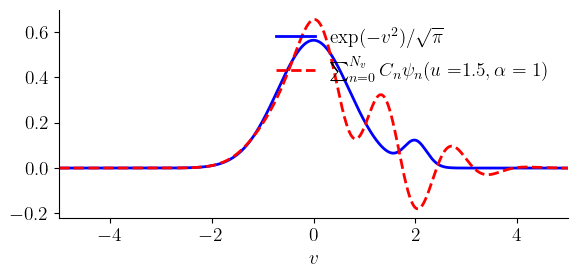

In [20]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(v, f0, label=r"$\exp(-v^2)/\sqrt{\pi}$", color="blue", linewidth=2)
ax.plot(v, sol, color="red", ls="--", label=r"$\sum_{n=0}^{N_{v}} C_{n}\psi_{n}(u=$" + str(u_new) + r"$, \alpha=1)$", linewidth=2)
legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=14, loc='upper right')
legend.get_frame().set_alpha(0)
ax.set_xlim(-5, 5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("$v$")
plt.tight_layout()
plt.savefig("../figures/functional_analysis/u_approx_" + str(u_new) + ".png", dpi=300) 

# Is my P matrix kosher?

In [21]:
P =  P_case_iii(alpha_curr=alpha_new, alpha_prev=alpha, Nv=Nv)

In [22]:
def proj_1d_Koshkarov(a,b,Nn):
    Pnn = np.zeros((Nn,Nn))
    for n in range(Nn):
        for m in range(Nn):
            if n == m:
                Pnn[n,m] = 1/a**(n+1)
                
            elif n > m: # lower diagonal
                
                if (abs(b) < 1e-16 and abs(a - 1.0) < 1e-16):
                    return Pnn # return 1 on diagonal?
                #elif (abs(b) < 1e-16):
                elif (b == 0.0):

                    el = 1/a
                    if ((n-m)%2 != 0):
                        continue
                    for i in range(2, n-m+1, 2):
                        el *= np.sqrt((i-1.0)/(1.0*i))*(1.0/(a*a) - 1.0)
                    for j in range(1, m+1):
                        el *= np.sqrt((1.0*(j+(n-m)))/(1.0*j))/a
                    Pnn[n,m] = el
                # elif (abs(a - 1.0) < 1e-16):
                elif (a == 1.0):
                    el = 1.0
                    
                    for i in range(1, n+1):
                        el *= -np.sqrt(2.0/i)*b

                    for j in range(1, m+1):
                        el *= -1.0/(b*np.sqrt(2*j)) * (n+1-j)
                    Pnn[n,m] = el
                else:
                    alpha = -2.0*b/a
                    beta  = 1.0/(a*a) - 1.0
                    chi   = beta/(alpha*alpha)
                    
                    temp = 1.0
                    for k in range(1, n-m+1):
                        temp *= alpha/k
                    
                    sum = temp
                    for k in range(1, int((1e-16+1.0*(n-m))/2.0) + 1):
                    # for k in range(1, (n-m)/2+1):
                        temp *= (n-m-2*k+2)*(n-m-2*k+1)*chi/k
                        sum += temp
                    
                    sum *= 1.0/a**(m+1)
                    for k in range(m+1, n+1):
                        sum *= np.sqrt(k/2.0)
                        
                    Pnn[n,m] = sum
    return Pnn


In [23]:
P_koshkarov = proj_1d_Koshkarov(a= a_constant(alpha_curr=alpha_new, alpha_prev=alpha),
                                b=b_constant(u_curr=u, u_prev=u, alpha_prev=alpha),Nn=Nv)

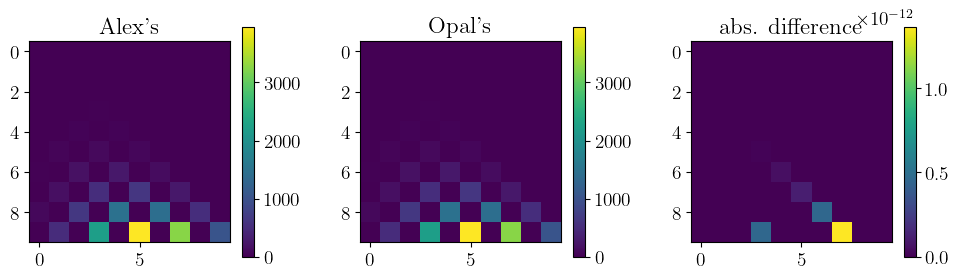

In [24]:
fig, ax = plt.subplots(ncols=3, figsize=(10, 3))
pos = ax[0].imshow(P_koshkarov)
cbar = fig.colorbar(pos)
ax[0].set_title("Alex's")
pos = ax[1].imshow(P)
cbar = fig.colorbar(pos)
ax[1].set_title("Opal's")
pos = ax[2].imshow(np.abs(P_koshkarov-P))
ax[2].set_title("abs. difference")
cbar = fig.colorbar(pos)
plt.tight_layout()
plt.savefig("../figures/functional_analysis/P_approx.png", dpi=300) 

# How can we extract the bulk?

In [74]:
def maxwellian(v, u, T):
    return 1 / np.sqrt(np.pi * T) * np.exp(- (v - u)**2 / T)

In [76]:
# initial guesses from two largest peaks
peak_idx = np.argmax(f0)
init_u = v[peak_idx]
init_n = f0[peak_idx] 
init_T = updated_alpha(alpha_prev=alpha,
              C20=C[2],
              C10=C[1],
              C00=C[0])

p0 = [init_u, init_T]

popt, pcov = curve_fit(maxwellian, v, signal, p0=p0, maxfev=2000000)

fitted = maxwellian(v, *popt)

In [80]:
print("Fitted parameters:")
print(f"Component 1: u={popt[0]:.4f}, T={popt[1]:.4f}")

Fitted parameters:
Component 1: u=0.0093, T=1.0389


In [81]:
popt

array([0.00929496, 1.03889953])

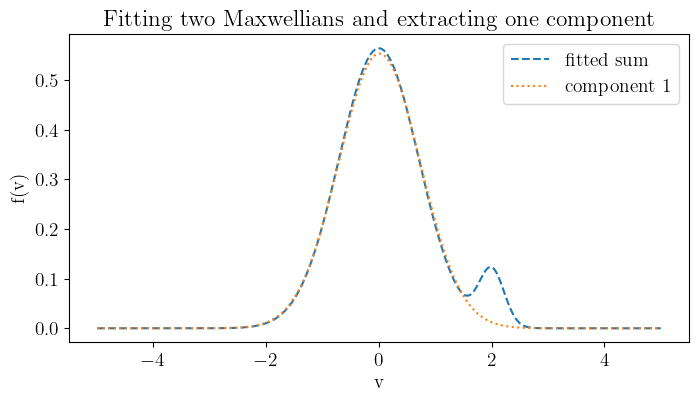

In [82]:
# plot
plt.figure(figsize=(8,4))
plt.plot(v, f0, label="fitted sum", linestyle="--")
plt.plot(v, fitted, label="component 1", linestyle=":")
plt.xlabel("v"); plt.ylabel("f(v)")
plt.legend(); plt.title("Fitting two Maxwellians and extracting one component")
plt.show()